In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Define the stock pairs and date range
pairs = [
    ("AAPL", "MSFT"),  # Technology
    ("GOOGL", "META"),  # Technology
    ("NVDA", "AMD"),  # Technology
    ("JPM", "BAC"),  # Financial
    ("GS", "MS"),  # Financial
    ("AMZN", "TSLA"),  # Consumer Discretionary
    ("PFE", "JNJ"),  # Healthcare
    ("CVX", "COP"),  # Energy
    ("KO", "PEP"),  # Consumer Staples
    ("VZ", "T")  # Telecommunications
]

start_date = '2020-01-01'
end_date = '2024-01-01'

In [3]:
def fetch_stock_data(pair):
    """Fetch historical stock data for a pair of companies."""
    data = yf.download(pair, start=start_date, end=end_date)['Adj Close']
    return data

def calculate_correlation(data):
    """Calculate correlation between two stocks."""
    return data.corr().iloc[0, 1]

def adf_test(series):
    """Perform the Augmented Dickey-Fuller test."""
    result = sm.tsa.stattools.adfuller(series)
    return result[1]  # p-value

def check_cointegration(stock1_prices, stock2_prices):
    """Check if two stocks are cointegrated."""
    p_value = adf_test(stock1_prices - stock2_prices)
    return p_value


In [4]:
def backtest_strategy(stock1_prices, stock2_prices, entry_threshold, exit_threshold):
    """Backtest the pairs trading strategy."""
    position = 0  # 1 for long, -1 for short, 0 for no position
    entry_price = 0
    profits = []

    for price1, price2 in zip(stock1_prices, stock2_prices):
        spread = price1 - price2
        
        # Entry signal for long position
        if spread < entry_threshold and position == 0:
            position = 1  # Enter long
            entry_price = price1

        # Exit signal for long position
        elif spread > exit_threshold and position == 1:
            position = 0  # Exit position
            profits.append(price1 - entry_price)  # Capture profit

    return np.sum(profits)


In [5]:
def analyze_pairs(pairs):
    """Analyze each pair for correlation, cointegration, and backtest."""
    results = []
    
    for company1, company2 in pairs:
        data = fetch_stock_data((company1, company2))
        
        # Calculate correlation
        correlation_value = calculate_correlation(data)
        p_value = check_cointegration(data[company1], data[company2])
        
        # Store results
        results.append({
            'Company 1': company1,
            'Company 2': company2,
            'Correlation': correlation_value,
            'Cointegration p-value': p_value
        })
        
        # Print analysis results
        print(f"Correlation between {company1} and {company2}: {correlation_value:.2f}")
        print(f"Cointegration p-value between {company1} and {company2}: {p_value:.5f}")

        if p_value < 0.05:  # Check for cointegration
            print(f"{company1} and {company2} are cointegrated (p-value < 0.05)")
            
            # Backtesting parameters
            entry_threshold = -2  # Example entry threshold
            exit_threshold = 0.5   # Example exit threshold
            
            # Run backtest
            total_profit = backtest_strategy(data[company1], data[company2], entry_threshold, exit_threshold)
            print(f"Total profit from backtesting: {total_profit:.2f}")
        else:
            print(f"{company1} and {company2} are not cointegrated (p-value >= 0.05)")


In [6]:
def plot_results(pairs):
    """Plot the adjusted close prices of the pairs."""
    plt.figure(figsize=(14, 7))
    
    for company1, company2 in pairs:
        data = fetch_stock_data((company1, company2))
        plt.plot(data, label=[company1, company2])

    plt.title("Stock Prices of Pairs")
    plt.xlabel("Date")
    plt.ylabel("Adjusted Close Price")
    plt.legend()
    plt.show()

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


Correlation between AAPL and MSFT: 0.94
Cointegration p-value between AAPL and MSFT: 0.78761
AAPL and MSFT are not cointegrated (p-value >= 0.05)
Correlation between GOOGL and META: 0.55
Cointegration p-value between GOOGL and META: 0.67903
GOOGL and META are not cointegrated (p-value >= 0.05)


[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed

Correlation between NVDA and AMD: 0.75
Cointegration p-value between NVDA and AMD: 0.20046
NVDA and AMD are not cointegrated (p-value >= 0.05)



[*********************100%***********************]  2 of 2 completed

Correlation between JPM and BAC: 0.74
Cointegration p-value between JPM and BAC: 0.89089
JPM and BAC are not cointegrated (p-value >= 0.05)



[*********************100%***********************]  2 of 2 completed


Correlation between GS and MS: 0.98
Cointegration p-value between GS and MS: 0.66217
GS and MS are not cointegrated (p-value >= 0.05)
Correlation between AMZN and TSLA: 0.48
Cointegration p-value between AMZN and TSLA: 0.24721
AMZN and TSLA are not cointegrated (p-value >= 0.05)


[*********************100%***********************]  2 of 2 completed


Correlation between PFE and JNJ: 0.76
Cointegration p-value between PFE and JNJ: 0.10162
PFE and JNJ are not cointegrated (p-value >= 0.05)


[*********************100%***********************]  2 of 2 completed


Correlation between CVX and COP: 0.98
Cointegration p-value between CVX and COP: 0.16399
CVX and COP are not cointegrated (p-value >= 0.05)


[*********************100%***********************]  2 of 2 completed


Correlation between KO and PEP: 0.93
Cointegration p-value between KO and PEP: 0.50123
KO and PEP are not cointegrated (p-value >= 0.05)


[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


Correlation between VZ and T: 0.55
Cointegration p-value between VZ and T: 0.72791
VZ and T are not cointegrated (p-value >= 0.05)


[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


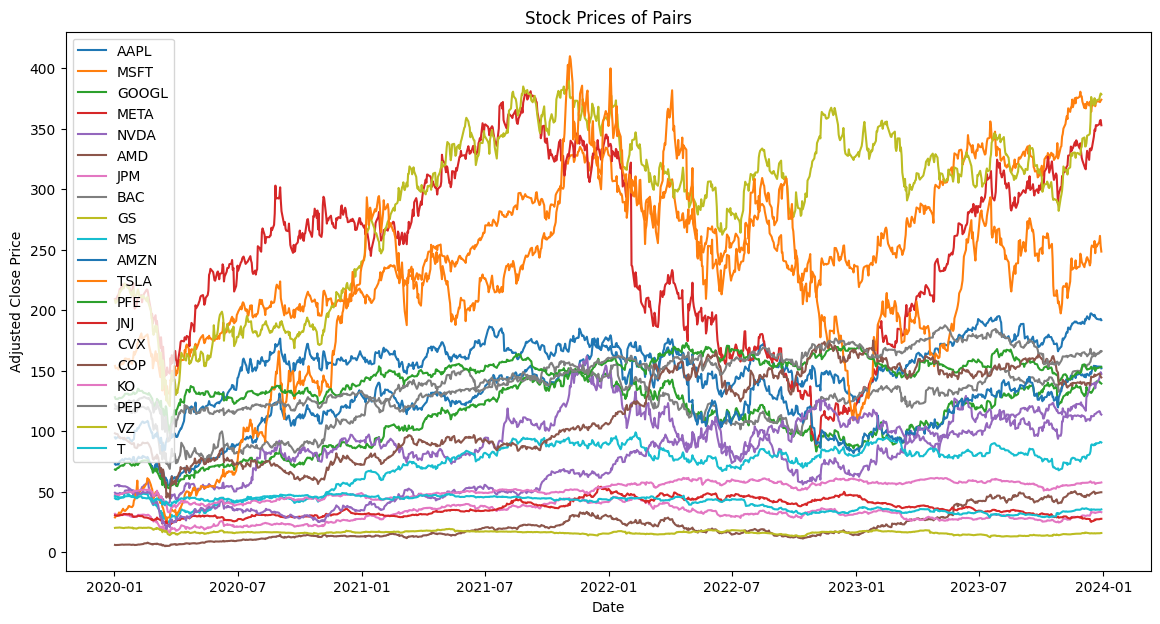

In [7]:
if __name__ == "__main__":
    analyze_pairs(pairs)  # Analyze pairs
    plot_results(pairs)    # Plot results